In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import h5py
import mask_align

import sys
sys.path.append('C:/Users/w37262do/Documents/git/PyIR/src')
from pyir_spectralcollection import PyIR_SpectralCollection as pir

## Load HE & IR

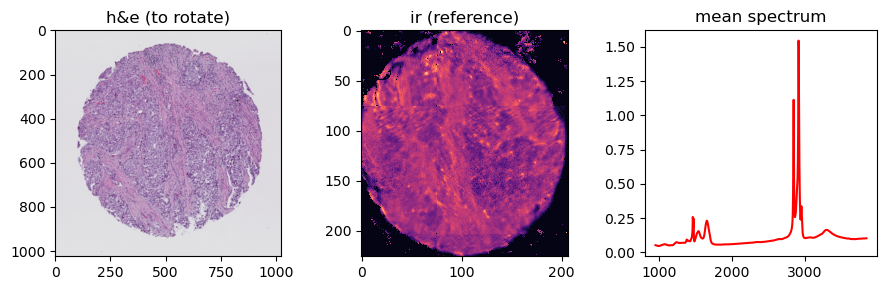

In [2]:
he = cv2.resize(
    cv2.imread(r'C:/Users/w37262do/Datasets/pcuk_2023/H_E_segmented/Slide 2/I-8.jpg',),
    (1024,1024),
    interpolation=cv2.INTER_AREA)[...,::-1].copy() / 255.0

f = h5py.File(r'E:/workspace/code/PcrUK/PcrUK/HDF5 Data 3D/Slide 2/DataCube/c23_p114aT')
ir = f['data/intensities'][:]
wv = f['data/wavenumbers'][0]
f.close()

fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].imshow(he); ax[0].set_title("h&e (to rotate)")
ax[1].imshow(ir[...,365],cmap='magma'); ax[1].set_title("ir (reference)") 
ax[2].plot(wv,ir.mean(axis=(0,1)),'r'); ax[2].set_title("mean spectrum")
fig.tight_layout()

## Convert to masks

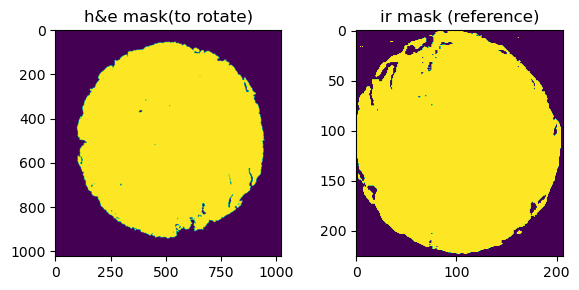

In [3]:
he_mask = mask_align.he_to_mask(he,pixel_proportion=0.99)

kit = pir()
ir_mask = kit.area_between(1600,1700,ir,wv) >= 2
ir_mask = ir_mask.reshape(ir.shape[:2])

fig,ax = plt.subplots(1,2,figsize=(6,3))
ax[0].imshow(he_mask); ax[0].set_title("h&e mask(to rotate)")
ax[1].imshow(ir_mask); ax[1].set_title("ir mask (reference)") 
fig.tight_layout()

## Align masks

In [4]:
aligned,affine_matrix = mask_align.align_masks(he_mask,ir_mask)
print(affine_matrix)

[[-0.84183723  0.03315264 -0.0135378 ]
 [ 0.00481152 -0.87846261 -0.01929006]
 [ 0.          0.          1.        ]]


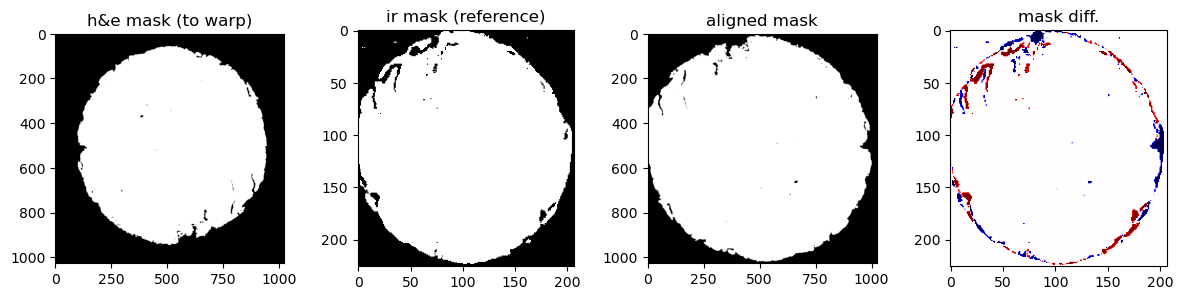

In [5]:
fig,ax = plt.subplots(1,4,figsize=(12,3))
ax[0].imshow(he_mask,cmap='grey'); ax[0].set_title("h&e mask (to warp)")
ax[1].imshow(ir_mask,cmap='grey'); ax[1].set_title("ir mask (reference)") 
ax[2].imshow(aligned,cmap='grey'); ax[2].set_title("aligned mask")
ax[3].imshow(cv2.resize(aligned,(ir_mask.shape[1],ir_mask.shape[0]))-ir_mask,cmap='seismic'); ax[3].set_title("mask diff.")
fig.tight_layout()

## Transform to match

In [6]:
aligned_he = mask_align.affine_warp(he,affine_matrix)

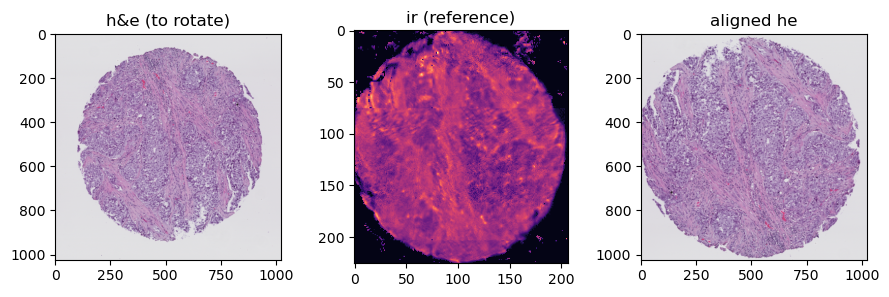

In [7]:
fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].imshow(he); ax[0].set_title("h&e (to rotate)")
ax[1].imshow(ir[...,365],cmap='magma'); ax[1].set_title("ir (reference)") 
ax[2].imshow(aligned_he); ax[2].set_title("aligned he")
fig.tight_layout()